# **Machine Learning**
To build computer systems that can improve themselves by learning from data.

(Xây những hệ thống mà có khả năng tự cải thiện bản thân bằng cách học từ dữ liệu)
- Some venues: NeurlPS, ICML, IJCAI, AAAI, ICLR, ACML, ECML.

# **Data Mining (DM - Khai phá dữ liệu)**
**To find new and useful knowledge from datasets.**

**(Tìm ra/ Khai phá những tri thức mới và hữu dụng từ các tập dữ liệu lớn.)**
 - Some venues: KDD, PKDD, PAKDD, ICDM, CIKM.

Data mining là quá trình khám phá thông tin mới từ các tập dữ liệu lớn, phức tạp thông qua việc sử dụng các phương pháp và công cụ phân tích. Mục tiêu chính của data mining là tìm ra các mối quan hệ, xu hướng, mẫu, và thông tin ẩn trong dữ liệu, giúp hiểu rõ hơn về dữ liệu và đưa ra dự đoán có thể hữu ích cho quyết định kinh doanh.

Các phương pháp data mining bao gồm clustering (phân cụm), classification (phân loại), regression (hồi quy), association rule mining (khai thác luật kết hợp), và nhiều kỹ thuật khác. Công cụ và kỹ thuật data mining thường được áp dụng trong nhiều lĩnh vực như kinh doanh, y tế, khoa học, tài chính, và nhiều ngành công nghiệp khác để khám phá tri thức ẩn trong dữ liệu và hỗ trợ quyết định.

# **Data**

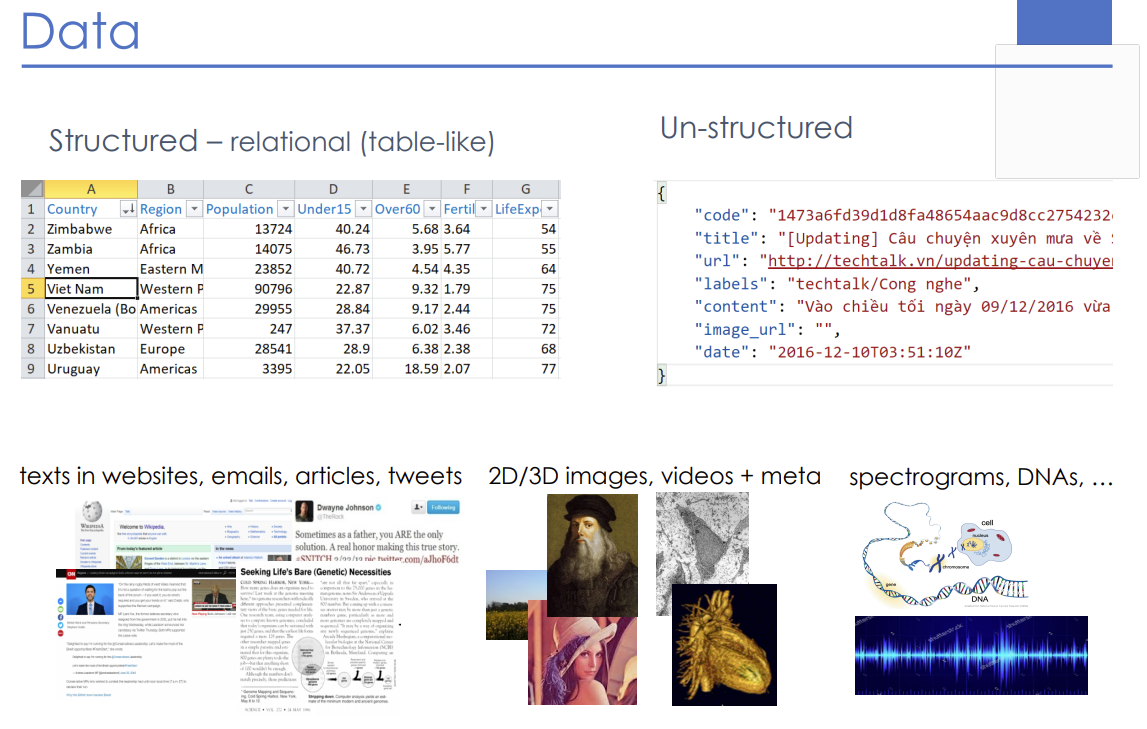

# **Quy trình thực hiện**

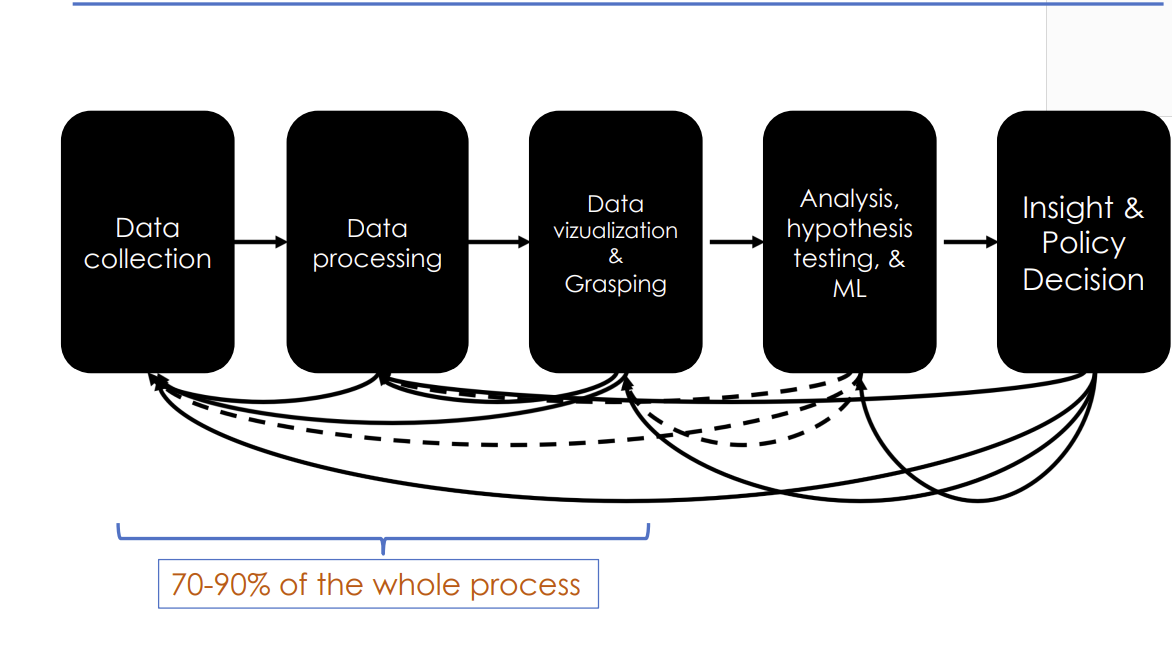

Thu thập dữ liệu -> Tiền xử lí dữ liệu -> Trực quan hoá dữ liệu -> Phân tích kiểm tra tìm phương pháp phù hợp ví dụ (DM, ML) -> Thông tin chuyên sâu, chính sách




# **Code dùng linear regression**




## Bài toán
 - Dự đoán khả năng tiến triển của bệnh tiểu đường thông qua các chỉ số sinh lý của cơ thể.


## Thông tin dữ liệu:

- Số lượng mẫu: 442 (thông tin từ 442 bệnh nhân)
- Thông tin ccs thuộc tính (10 cột đầu tiên):
  - Age(tuổi)
  - Sex (giới tính)
  - Body mass index (chỉ số khối cơ thể)
  - Average blood pressure(huyết ap trung bình)
  - S1, S2, S3, S4, S5, S6 (sáu phép đo huyết thanh khác)
- Mục tiêu: Cột 11, chỉ số đánh giá mức độ tiến triển của bệnh sau 1 năm điều trị

**! Chú ý: Các thuộc tính trong dữ liệu đã được chuẩn hóa**

Xem thêm thông tin về nguồn dữ liệu tại: (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)


## Hướng giải quyết

Giả sử rằng khả năng tiến triển của bệnh tiểu đường (ký hiệu: `y`) là đại lượng phụ thuộc tuyến tính vào các thông tin sinh lý của bệnh nhân như các thuộc tính đã mô tả ở trên (tuổi, giới tính, chỉ số khối, ... - ký hiệu: $x_1, x_2, .. x_n$) :

$y = w_0 + w_1x_1 + w_1x_2 + ... + w_nx_n$

Mục tiêu: Tìm được bộ trọng số $[w_0, w_1, w_2... w_n]$ biểu diễn mối quan hệ này.

## Thư viện sử dụng

- matplotlib: phục vụ vẽ các đồ thị
- numpy: tính toán các phép biến đổi trên ma trận / vector
- math: thực hiện một số hàm tính toán đơn giản
- pandas: Xử lý dữ liệu bảng hai chiều
- scikit-learn: (sklearn) thư viện hỗ trợ xây dựng các mô hình học máy, các hàm huấn luyện và đánh giá


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import math
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


## 1. Đọc dữ liệu huấn luyện

Dữ liệu huấn luyện về bệnh tiểu đường được lưu dưới dạng file .pkl với hai thuộc tính:
- data: ma trận 2 chiều (400x10) - các thông tin bệnh nhân được chuẩn hoá về dạng số thực
- target: mảng các số thực (400,) - chỉ số tiến triển của bệnh tiểu đường

In [2]:
with open('diabetes_train.pkl', 'rb') as f:
    diabetes_train = pickle.load(f)
print("Số chiều input: ", diabetes_train['data'].shape)
print("Số chiều target y tương ứng: ", diabetes_train['target'].shape)
print()

print("2 mẫu dữ liệu đầu tiên:")
print("input: ", diabetes_train['data'][:2])
print("target: ",diabetes_train['target'][:2])

Số chiều input:  (400, 10)
Số chiều target y tương ứng:  (400,)

2 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]
target:  [151.  75.]


In [17]:
data_train = diabetes_train['data']
target_train = diabetes_train['target']

df_train = pd.DataFrame({'data': data_train.tolist(), 'target': target_train.tolist()})

df_train


,data,target
0,"[0.0380759064334241, 0.0506801187398187, 0.061...",151.0
1,"[-0.00188201652779104, -0.044641636506989, -0....",75.0
2,"[0.0852989062966783, 0.0506801187398187, 0.044...",141.0
3,"[-0.0890629393522603, -0.044641636506989, -0.0...",206.0
4,"[0.00538306037424807, -0.044641636506989, -0.0...",135.0
...,...,...
395,"[-0.0600026317441039, -0.044641636506989, 0.00...",258.0
396,"[-0.0854304009012408, 0.0506801187398187, -0.0...",43.0
397,"[0.0526060602375023, -0.044641636506989, -0.00...",198.0
398,"[0.0126481372762872, -0.044641636506989, 0.015...",242.0


## 2. Xây dựng mô hình hồi quy sử dụng Sklearn

Thử nghiệm xây dựng và huấn luyện mô hình hồi quy tuyến tính (Linear Regression)
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `linear_model.LinearRegression()`

In [12]:
# Xây dựng mô hình sử dụng thư viện scikit-learn
regr = linear_model.LinearRegression()


## 3. Huấn luyện mô hình

Sử dụng dữ liệu đã được chia ở bước trước đó để thực hiện huấn luyện mô hình

=> Tìm được bộ trọng số $[w_0, w_1, ... w_n]$

$y = w_0 + w_1x_1 + w_1x_2 + ... + w_nx_n$

Mục tiêu: Tìm được bộ trọng số $[w_0, w_1, w_2... w_n]$ biểu diễn mối quan hệ này.

Trong trường hợp này, regr.coef_ sẽ là một mảng
y = $[w_1, w_2... w_n]$ còn
regr.intercept_ sẽ là $w_0$

Nhìn chung, regr.coef_ chứa thông tin về trọng số của các đặc trưng, trong khi regr.intercept_ chứa thông tin về giá trị chặn của mô hình.

In [13]:
# huấn luyện mô hình
regr.fit(data_train, target_train)
print("[w1, ... w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ... w_n] =  [   5.02597344 -238.41461528  521.63399624  299.94110951 -752.12376074
  445.15341214   83.51201877  185.57718337  706.4729074    88.68448421]
w0 =  152.72942545098695


## 4. Dự đoán các mẫu dữ liệu trong tập test

# 4.1 Phán đoán

In [15]:
# đọc dữ liệu test
# dữ liệu test có cấu trúc giống dữ liệu huấn luyện nhưng số lượng mẫu chỉ là 42
with open('diabetes_test.pkl', 'rb') as f:
    diabetes_test = pickle.load(f)

# Thực hiện phán đoán cho dữ liệu mới
diabetes_y_pred = regr.predict(diabetes_test['data'])

In [16]:
data_test=diabetes_test['data']
target_test=diabetes_test['target']
df_test=pd.DataFrame({'data':data_test.tolist(),'target':target_test.tolist()})
df_test

,data,target
0,"[-0.0236772472339084, -0.044641636506989, 0.04...",175.0
1,"[0.0162806757273067, -0.044641636506989, -0.04...",93.0
2,"[0.110726675453815, 0.0506801187398187, -0.033...",168.0
3,"[-0.0200447087828888, -0.044641636506989, 0.09...",275.0
4,"[-0.0164121703318693, -0.044641636506989, 0.05...",293.0
5,"[0.0489735217864827, 0.0506801187398187, 0.123...",281.0
6,"[-0.0563700932930843, -0.044641636506989, -0.0...",72.0
7,"[0.0271782910803654, -0.044641636506989, 0.092...",140.0
8,"[0.063503675590561, -0.044641636506989, -0.050...",189.0
9,"[-0.0527375548420648, 0.0506801187398187, -0.0...",181.0


## 4.2 Kiểm tra chất lượng phán đoán

In [18]:
df = pd.DataFrame(data=np.array([target_test, diabetes_y_pred,
                            abs(target_test - diabetes_y_pred)]).T,
             columns=["y thực tế", "y dự đoán", "Lệch"])

# In ra 5 phán đoán đầu tiên
df.head(5)

,y thực tế,y dự đoán,Lệch
0,175.0,185.393435,10.393435
1,93.0,90.338849,2.661151
2,168.0,152.325453,15.674547
3,275.0,250.866783,24.133217
4,293.0,198.458698,94.541302


Sử dụng độ đo RMSE (căn bậc 2 của trung bình bình phương lỗi)
> $\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{m} \sum\limits_{i=1}^{m} (y_i - \hat{y}_i)^2}$

- RMSE càng nhỏ càng thể hiện mô hình có khả năng học và dự đoán hiệu quả

In [ ]:
rmse = math.sqrt(mean_squared_error(diabetes_test['target'], diabetes_y_pred))
print(f'RMSE = {rmse}')

RMSE = 40.85033252728767


Phân phối các dự đoán đầu ra của mô hình

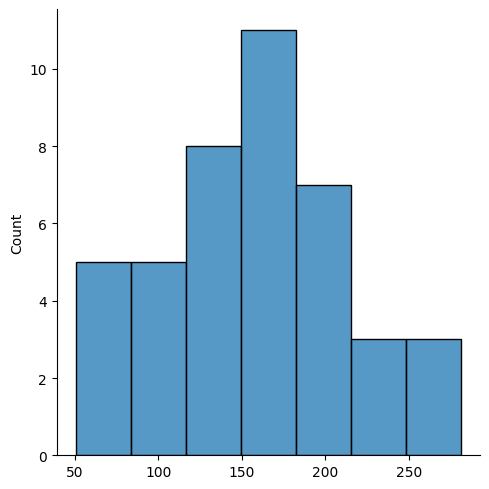

In [ ]:
sns.displot(diabetes_y_pred, )

Hình ảnh mô tả phân phối các dự đoán đầu ra của mô hình trên dữ liệu test. Trong đó, trục ngang là giá trị dự đoán và trục đứng là số lần dự đoán các giá trị đó.





# **Data Preprocessing**

Thu thập, tiền xử lí dữ liệu

# **Thời gian**
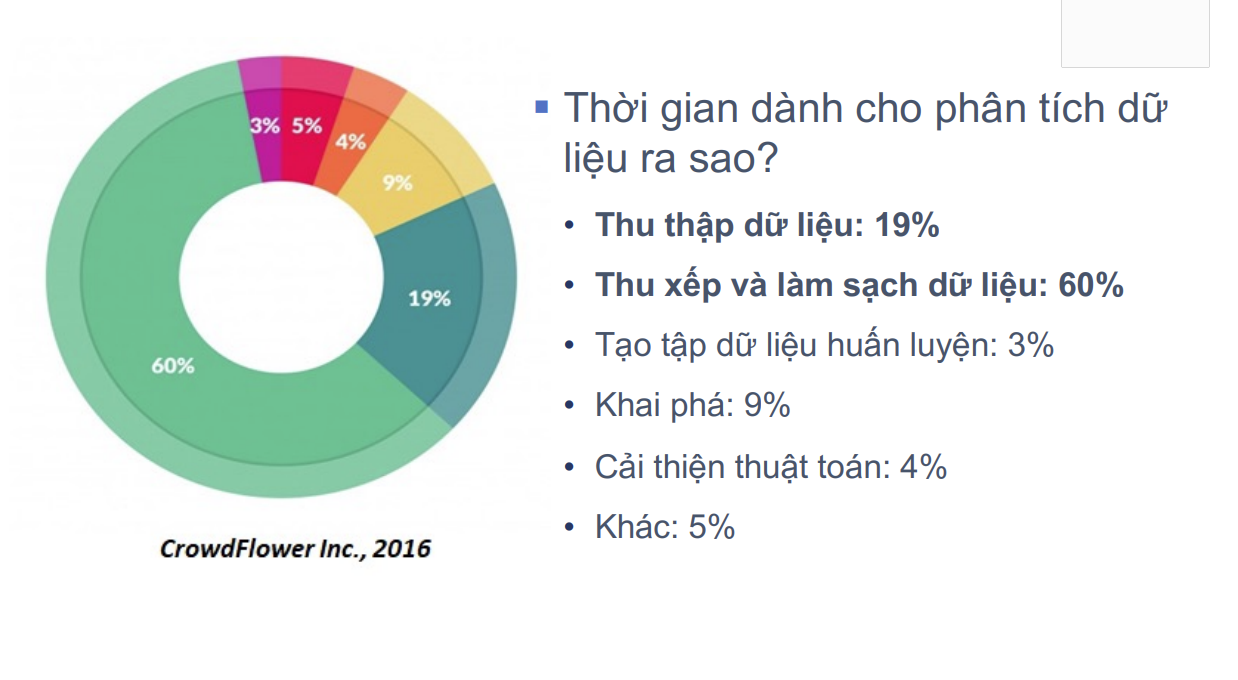

# **Tiền xử lý để làm gì**

• Thuận tiện trong lưu trữ, truy vấn

• Các mô hình học máy thường làm việc với dữ liệu có cấu trúc: ma trận,
vectơ, chuỗi,…

• Học máy thường làm việc hiệu quả nếu có biểu diễn dữ liệu phù hợp

# **Thu thập dữ liệu**

• Lấy mẫu (sampling)

- **Variety**

 - Tập mẫu
thu được đủ đa
dạng để phủ hết các
ngữ cảnh của lĩnh
vực.

- **Bias**

 - Dữ liệu cần
tổng quát, không bị
sai lệch, thiên vị về
1 bộ phận nhỏ nào
đó của lĩnh vực.

• **Kỹ thuật: crawling, logging, scraping**

- **Crowd-sourcing**:

 - Survey – thực hiện các khảo sát

- **Logging**:

 - Lưu lại lịch sử tương tác của người dùng, truy
cập sản phẩm,…

- **Scrapping**:

 - Tìm kiếm nguồn dữ liệu trên các website, tải
về, bóc tách, lọc,…


# **Xử lý dữ liệu**

• Lọc nhiễu, làm sạch, số hoá,…

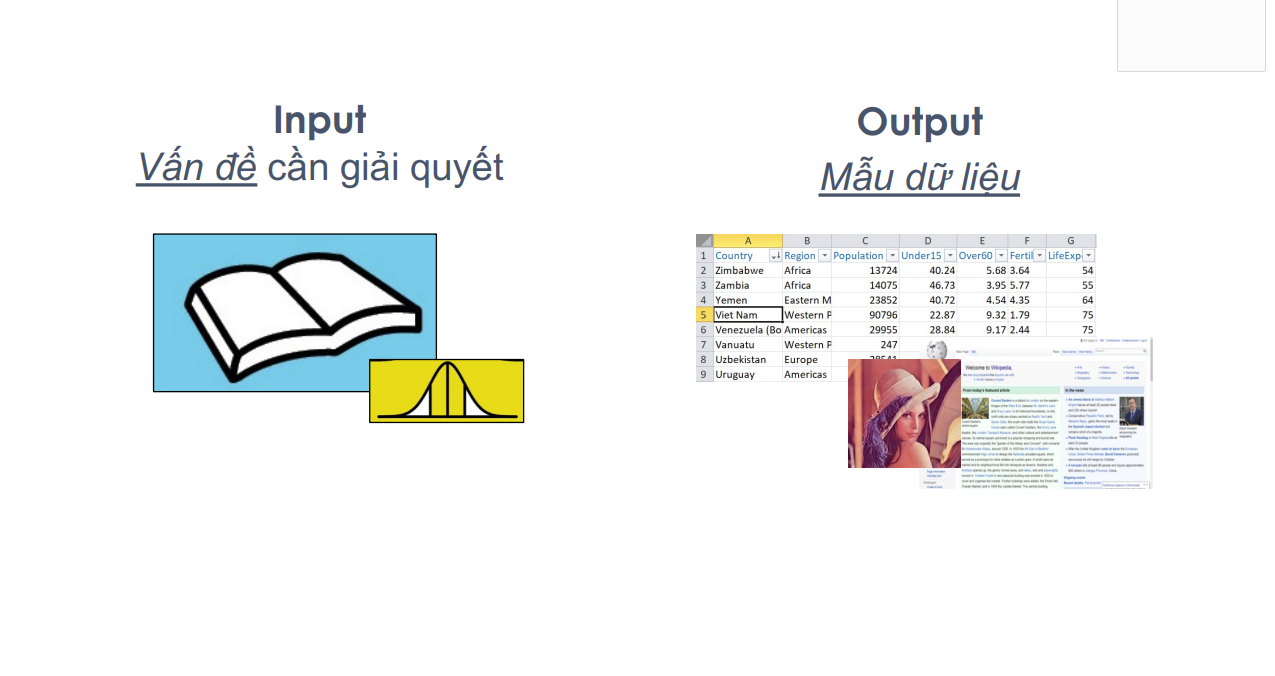

# **Tiền xử lí dữ llệu**

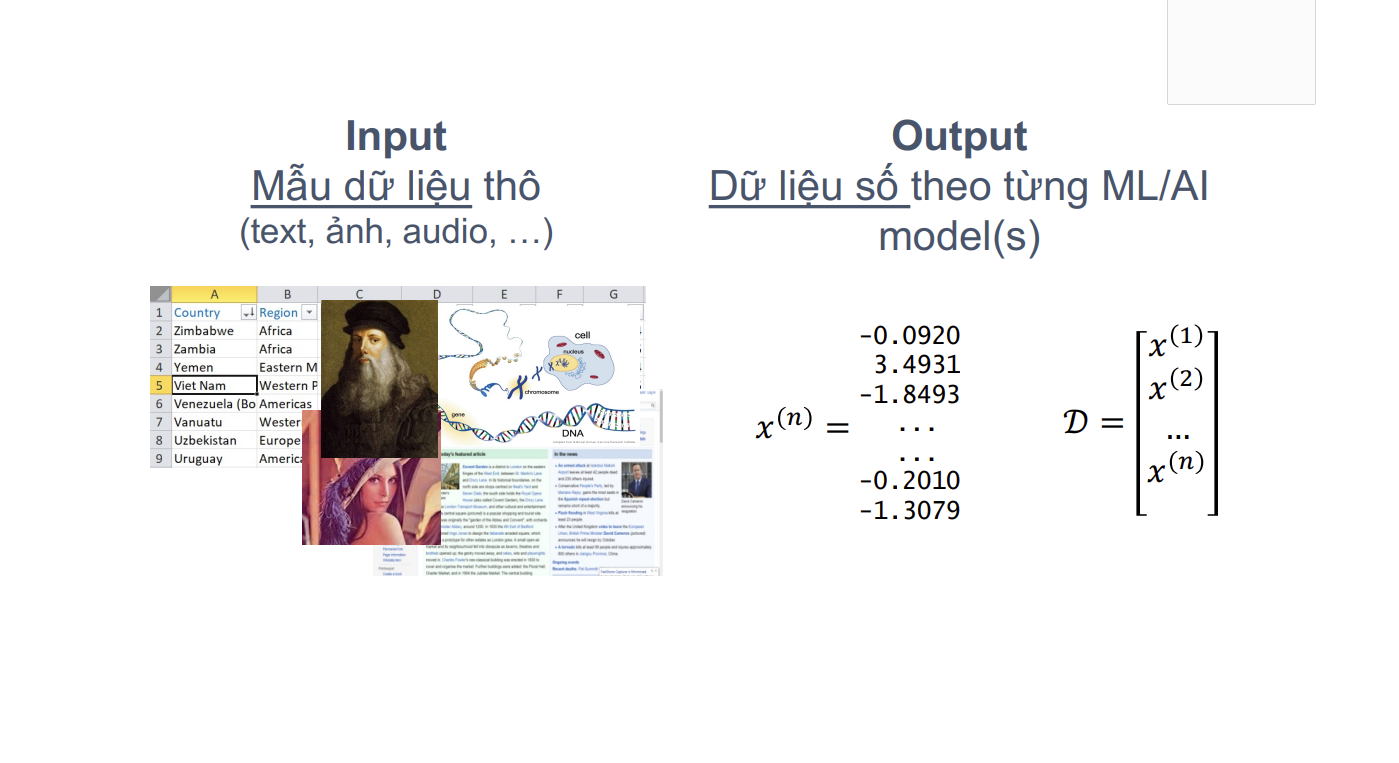


# <h1><center> **Tiền xử lý dữ liệu cho dữ liệu về  loại thuốc phản ứng của người bệnh** </center></h1>

<div id="Giới thiệu về dữ liệu">
    <h2>Giới thiệu về dữ liệu</h2>
    Giả sử bạn là một người nghiên cứu về dữ liệu y học, bạn đã thu thập được một tập dữ liệu các bệnh nhân của cùng một loại bệnh, trong khi điều trị mỗi bệnh nhân phản ứng với 1 trong 5 loại thuốc A, B, C, X và Y.
    <br>
    <br>
    Công việc cần làm là xây dựng một mô hình nhằm tìm ra loại thuốc phù hợp cho bệnh nhân mới bị mắc loại bệnh trên. Các trường dữ liệu gồm gồm có: Age, Sex, Blood Pressur, Cholesterol, Na_to_K, Drug
    <br>
    <br>
    Chúng ta sử dụng phần dữ liệu huấn luyện để xây dựng mô hình Random Forest và đánh giá mô hình này trên tập đánh giá, sau đó sử dụng mô hình để phán đoán cho bệnh nhân mới
</div>


In [ ]:
import numpy as np
import pandas as pd

<div id="downloading_data">
    <h2>Load dữ liệu từ file</h2>
<!--     Sử dụng wget để tải dữ liệu từ IBM Object Storage. -->
</div>

Đọc dữ liệu vào pandas dataframe

In [ ]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Kích thước của dữ liệu

In [ ]:
my_data.shape

(200, 6)

<div href="pre-processing">
    <h2>Tiền xử lý dữ liệu</h2>
</div>

<b>my_data</b> là  Drug.csv sau khi đọc vào pandas dataframe, chúng ta định nghĩa các tham số sau: <br>

<ul>
    <li> <b> X </b> as the <b> Ma trận thuộc tính </b> (data of my_data)
    <li> <b> y </b> as the <b> Vector thuốc phản hồi (target) </b> </li>
</ul>

In [ ]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Một vài trường trong dữ liệu có dạng categorical, như __Sex__ và __BP__. Mô hình Random Forest trong thư viện này chỉ xử lý với dữ liệu số thực do đó chúng ta cần chuyển các thuộc tính trên về dạng số thực tương ứng. Sử dụng  __skearn.preprocessing__ để chuyển dữ liệu dạng categorical về số thực

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

print(X[0:5])

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


Chuẩn hóa thuộc tính __Na_to_K__ về __mean__=0 và __std__=1

In [ ]:
mean = X[:, -1].mean()
std = X[:, -1].std()
X[:, -1] = (X[:, -1] - mean) / std
print(X[0:5])

[[23 0 0 0 1.2865221173753503]
 [47 1 1 0 -0.4151453955143358]
 [47 1 1 0 -0.8285581765368749]
 [28 0 2 0 -1.1499626749753444]
 [61 0 1 0 0.2717942708373152]]


Dữ liệu target về loại thuốc phản ứng

In [ ]:
y = my_data["Drug"]
print(y[0:5])

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object


Đưa __y__ về dạng số thực

In [ ]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['drugA','drugB', 'drugC', 'drugX', 'drugY'])
y = le_sex.transform(y)

In [ ]:
print(y[0:5])

[4 2 2 3 4]
